<center>
    <h1>C++ kernel based on xeus</h1>
</center>

A Jupyter kernel for C++ based on the `CppInterOp`, a clang based C++ Interoperability Library and the `xeus` native implementation of the Jupyter protocol, xeus.

- GitHub repository: https://github.com/compiler-research/xeus-cpp
- Documentation: https://xeus-cpp.readthedocs.io/en/latest/

## Usage

<div style="background: #efffed;
            border: 1px solid grey;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; ">
    <i class="fa-play fa" 
       style="font-size: 40px;
              line-height: 40px;
              margin: 8px;
              color: #444;">
    </i>
    <div>
    To run the selected code cell, hit <pre style="background: #efffed">Shift + Enter</pre>
    </div>
</div>

## Output and error streams

`std::cout` and `std::cerr` are redirected to the notebook frontend.

In [1]:
#include <iostream>

std::cout << "some output" << std::endl;

some output


In [2]:
std::cerr << "some error" << std::endl;

some error


In [3]:
#include <stdexcept>

try {
    throw std::runtime_error("Unknown exception");
}
catch (const std::exception& e) {
    std::cout << "Caught an exception: " << e.what() << std::endl;
}

Caught an exception: Unknown exception


In [4]:
int j = 5;
std::cout << j << std::endl;

5


# Interpreting the C++ programming language
# You can define functions, classes, templates, etc ...

## Functions

In [5]:
double sqr(double a)
{
    return a * a;
}

In [6]:
double a = 2.5;
double asqr = sqr(a);
std::cout << asqr << std::endl;

6.25


## Classes

In [7]:
class Foo
{
public:

    virtual ~Foo() {}

    virtual void print(double value) const
    {
        std::cout << "Foo value = " << value << std::endl;
    }
};

In [8]:
Foo bar;
bar.print(1.2);

Foo value = 1.2


## Polymorphism

In [9]:
class Bar : public Foo
{
public:

    virtual ~Bar() {}

    virtual void print(double value) const
    {
        std::cout << "Bar value = " << 2 * value << std::endl;
    }
};

In [10]:
Foo* bar2 = new Bar;
bar2->print(1.2);
delete bar2;

Bar value = 2.4


## Templates

In [11]:
#include <typeinfo>

template <class T>
class FooT
{
public:

    explicit FooT(const T& t) : m_t(t) {}

    void print() const
    {
        std::cout << typeid(T).name() << " m_t = " << m_t << std::endl;
    }

private:

    T m_t;
};

In [12]:
FooT<double> foot(1.2);
foot.print();

d m_t = 1.2


## Documentation

 - Documentation for types of the standard library is retrieved on cppreference.com.

In [13]:
?std::vector

https://en.cppreference.com/w/cpp/container/vector

## Using the display_data mechanism

For a user-defined type `T`, the rich rendering in the notebook and JupyterLab can be enabled by by implementing the function `nl::json mime_bundle_repr(const T& im)`, which returns the JSON mime bundle for that type.

### Image example

In [14]:
#include <string>
#include <fstream>
#include <sstream>

#include "nlohmann/json.hpp"

#include "xeus/xbase64.hpp"

namespace nl = nlohmann;

namespace im
{
    struct image
    {
        inline image(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);
            m_buffer << fin.rdbuf();
        }

        std::stringstream m_buffer;
    };

    nl::json mime_bundle_repr(const image& i)
    {
        auto bundle = nl::json::object();
        bundle["image/png"] = xeus::base64encode(i.m_buffer.str());
        return bundle;
    }
}

In [15]:
im::image marie("../data/marie.png");

In [16]:
#include "xcpp/xdisplay.hpp"

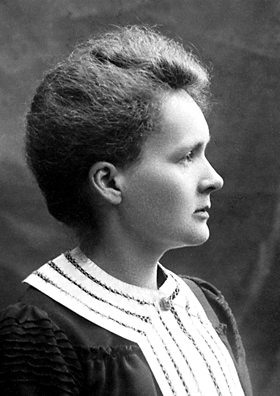

In [17]:
xcpp::display(marie);

### Audio example

In [18]:
namespace nl = nlohmann;

namespace au
{
    struct audio
    {
        inline audio(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);
            m_buffer << fin.rdbuf();
        }

        std::stringstream m_buffer;
    };

    nl::json mime_bundle_repr(const audio& a)
    {
        auto bundle = nl::json::object();
        bundle["text/html"] =
           std::string("<audio controls=\"controls\"><source src=\"data:audio/wav;base64,")
           + xeus::base64encode(a.m_buffer.str()) +
            "\" type=\"audio/wav\" /></audio>";
        return bundle;
    }
}

In [19]:
au::audio drums("../data/audio.wav");

In [20]:
xcpp::display(drums);

<source src="data:audio/wav;base64,UklGRtTUBwBXQVZFZm10IBAAAAABAAIARKwAABCxAgAEABAAZGF0YWjUBwC5/+n/rf/s/7L/7f+4/+//vf/w/7n/7P+9/+v/wf/w/8H/8f/E//T/wf/z/8H/8f/E//H/wv/w/8H/7P++/+//wv/x/8D/7//C//H/xP/0/8H/7/++/+3/wf/x/8D/8f/B//D/wf/w/8H/9P/C//T/wv/z/8D/8/+9//H/wP/x/73/8P+8//D/vv/z/77/8P++//T/vf/x/77/9P+8//H/vP/v/7z/8P++//P/wf/3/8L/9f++//H/wP/0/77/9//B//f/wv/z/77/9f++//X/vv/x/8L/9f++//P/vP/1/73/9f++//f/wf/5/73/9/+8//f/vf/5/7n/9/+5//f/tv/3/7j/9P+x//H/0v8JAAEAKADh/xEAi//K/yn+wv4F/QT+xP2u/rUA2QB1A70CuASNAyoF0wPQBIQDQQNSAgUA9P+E+7r84/dB+mX2UPnL9q75kPdE+tL5/Pss/i7/MgOyAqwFQwTDBG4DUgKwAY4BPAEHAdYAbf+h/xz9/P3R+yn9F/xr/cr86v0L/RD+HP0l/iv/xv82BH4DvwlYB+8MYQnvC2gIcAceBSwDLwK0AIsA0P8AAKj/6/+h/+f/TgBvAAwCugE1BEkDLwamBIwHkAVRCBIGLwjoBaUHhgUdBygFeAazBKUFHgSxBHED3wPcAlsDhgL/AkMCrgIJAkkCwQH0AMUAg//G/4r/6P8sAvMBUQewBR4NuQneECoM0g8bC7MJiAYo/+T+ofIG9nrp5+9V6Wzw7/Hn9pL8UP62/i7/tfie+oT08/d/+Rj8oQa9BQgSYA2GEgoNpwytCAoIrwVZB1YF7AOYAmH5yvp+68/whN/k6DPneu9L7C3yqecE7z7yPPdD+0P92f9EAPcA0QBL/4f/+Pze/Uf3fPlx7MDxUukv8ODrJfJV7tvzUvAx9Zjve/SP76v01PBb9cbpB/C56P/vbvno/EYXSRIJKl4eESSSGFAO8AgHA9cBpf4A/+z89P0Q/Eb9r/mS+1X6SvwM/9j//wXPBM4K+gftDRkK4Q9YC0UOBgojCv4GoQXjA3sCvAGs/73/Mfw+/Vn4h/oJ9gn5IPY4+UT42fqf+nf89vqR/ED5Rftb+MP6NP2h/gcHswVJD1kLQgs6B5Hv0vL14z7szegE8PHqh/HP8Wn2T+oK8NTlFu6a/QsAMRLpDS8atxJrFN8N4gisBfwAdQCtAYUBtAi3BtkNCwo9C6kHogQWAwwFzQNPB2wF9g1zCqYVhw8tEosMgA/xCpQPBgtBD9AKCg+hCmgOMwo1DhoKBQ72CToOHwpUDjMKLg4PCpANwwnvDQ4K1Q6DCjwPqApcD7AKEg+ZCiUOJwqqDGoJ6gyoCRUPzgpIEc8LehG/C3wOGwoRC3oImQpkCDAOVApwEcQLfhDvCuIN1Al1CvoHgwzSCfYShw2dCwwHD/9n/mX1VPjk8qb3ZQGYApgSAg7lGGoRAhSLDcwL/gcVCbwGpg0rCusN+gn+D68LXxB8C5gFcQOp/tj+wvod/P34LPun+dL7efcx+trwIfVA6QnwvvKk9wv9ZP7w/lf/4P1v/kX5GPsH9TP4AfF99fDtiPNx6VnwJ+ip7x3uqvOy8hX2GvMV9hbuNPP35VDvgue/8HnxHfb0+Qz6uPNR9pjtgPMI7WHzMu7782ns5/Kx7dvzFfQO96z1Dfcb9C33Hu4C9WfqsPP9+Av8jwj1A+oIzQOM+lb8xO4a9+71xvtaCOcEBg0bBuAAEf8x8F32LOyv9HT3nvqUCdMFpRJ1DBELLwldCfcH4Q7oCZMQDgrvBGEDHfot/gT+pAD5DgIJHA+1B9QFAARX+Rz9f+dp75vnF+7A7DLxtOsi8r7o+/D668DysPPh9vn1M/g27rDzrugi8Wzuz/R6+un6dPop+gjuhPND5Bbv6egr8vz5NfuKArj+Y/bR99Xk7u7U5PTvpPQa+KX6DPpk+HT6m/aa+zf9if9cCawFAQoaBQH+6P4D9Mv6If11AB4OLgjJECEHtvvl+mbkqO9w4VXv5vL596UEHQArAyP/AflF/EL9SwFVCKUH4Q6gCZQJTQUVAIoAk/tI/isBzgDaC8EFigN+AaQAYgTfDYwOsBwFFBolyBU3GBMNPv9vAOv1QP2cAH0DqhH6CyIZYw8xEk4MHBAlDNoV8w49FMoN1wlRCCcAdwJlAFcAagaJAWwIUgN4BJIEBwS9BzUKCwqyGhES0yReF1cUtw7bCfYLOBD+DzYaaBH0BmYAOOY77aXO/eE0zAzicfUf/GUaRBE+IHoVNhndE2MUiBEqGfETPx3oFR0Vmg/4BtQEDPxz/Kb4Afr/63Tz++bT8g32Yv2kEPkOMCUyHaYsHCakMOUuGzewN+1J9USgWZBM6lClRD44TjUxJvoqLSmHK1I4sDAVOr8rhycGHAYPoAu+/UMBSP1WAX4G5wUhB68F+BqSFKgk6xkIEhMMvP71/q7yu/Vl9XP1agDG+SIF5/iz/OfwpeZs4VXGOMyBvDjHeMGfyRXFRMoBzN7MUcUSyA23usD9sP6+Zr79xlXX7NQM57LbXtvs06m09rMepQCetKhVo+erLK/EutC+Y8a7x9vDg8cnu0LDHbPHv7OxBr9jtXK/1r5iwTbF1sASvOi4+q6JqIetgKMYr8isHLjLvKrRbtH41/PXw8r600zLedo62ublh+m17Tjpoevr3mPk09lD4Dne7OCM4Ezg7NU12uHIXtSZzUTaxfY99u8Hcv9P+fn3FupF80bnXfQs9BP8DP9pACb4APu+9Pb5qPXp+YP2jvkABqIEcv9b/4TyQPfd+s785wx8B5INbQZj9yn5LOi48oro7vSf9Qj9PQQUBToDXgUhEk8WNSviLFc04TVRRMNAGEl8QlFAPDyRMl0ydTxhO81JkUU8RNhD/UokSmhRs03/UPFMj0odSbs+0UFBQbNB1U8ZR+pSnUe7Tm5HVUtjSghOC1NfTrVbfE0/Xq1M91iBSLZJBDVdORwwOzV5OoQ6MEESPS02TTaXLNUzNUJrRaRSIFtOU15js1KYWZMw7DK3KcMsnyv9K8AW3x8rG/ciWCyxLHRC5zl5Sok9qzhUMOMcfR4oD0oY+hz2I+YsKC9pMEAwNSwrKtog1B4xLWAlhjUuKFYWGxM0AqEGwQWsB3YbUBPuLjMdCSPRFX4IPgje+hsCdgBpBfMOZQyyGuoR4yDBFIEcwREgEBEKo/6b/sTp2vBp593sq/Z48QoGm/bHCrf3MPbZ7djZueKa1LrjzO0D8nkPNAH/FqIAe/vF78XQ3tZ5xv/SVelr6Fv8J/JR9jvud+r06J71u/Ce7bDomt/m3hHabdvg1aXXYsqXzwPCH8oFzGjOXtRf0cHS6M9fysjMCsfIzX3Pz9Op1sfWNthl13Pia96476HoIvHc6m7hL+Lc5SXlsvPn6pPyiuY82eDUCLY/v+astrqrw8vHv9MnzyLGgMUYrMW1t6SqsgXIm8jU5kPXMN2+znS9Cr3zpYimaacjn5WqeKcvtviyf7nWtpqw+K6Orlyn6632o2KxDq5xvti/Bbd6vJXBHsKj2R/LFt23yZu+H7cBrN6l3a65ozGtgaxawY/FGNFKzjjKI8ly1b/TL+jx4+znmuQIxm3OnK72vHqvkb8hw5HPW9LH12/gx9+940DhaNuX3o7hpuPa3svi5Ndu4FXWIOGg3ijn9t8i6PHgP+rA/Un6RwUt/hX2OPcc4MvsnNqN63/aH+zR6Ov2eQ/5D6E4YSUqOC4icghyCHvbzPKU2PfzhQCtCucpqCDELXIiow5QEn75sQn8D7IYmDTmLaw3BC5/EroXiuuyAvH7qg61KHQnWTiXLjEuMCdGDB0V9/b1DSkHtBqWKV4sxDRYLtgjjyVTGR0mETzfQPBjGlZeXEBLOFM4RV4wSy9ZC

### Update-display

In [21]:
namespace nl = nlohmann;

namespace ht
{
    struct html
    {
        inline html(const std::string& content)
        {
            m_content = content;
        }
        std::string m_content;
    };

    nl::json mime_bundle_repr(const html& a)
    {
        auto bundle = nl::json::object();
        bundle["text/html"] = a.m_content;
        return bundle;
    }
}

// A blue rectangle
ht::html rect(R"(
<div style='
    width: 90px;
    height: 50px;
    line-height: 50px;
    background-color: blue;
    color: white;
    text-align: center;'>
Original
</div>)");

In [22]:
xcpp::display(rect, "some_display_id");

Updated

In [23]:
// Update the rectangle to be red
rect.m_content = R"(
<div style='
    width: 90px;
    height: 50px;
    line-height: 50px;
    background-color: red;
    color: white;
    text-align: center;'>
Updated
</div>)";

xcpp::display(rect, "some_display_id", true);

### Clear output

In [24]:
#include <chrono>
#include <thread>

In [25]:
std::cout << "hello" << std::endl;
std::this_thread::sleep_for(std::chrono::seconds(1));
xcpp::clear_output();  // will flicker when replacing "hello" with "goodbye"
std::this_thread::sleep_for(std::chrono::seconds(1));
std::cout << "goodbye" << std::endl;

goodbye


In [26]:
std::cout << "hello" << std::endl;
std::this_thread::sleep_for(std::chrono::seconds(1));
xcpp::clear_output(true);  // prevents flickering
std::this_thread::sleep_for(std::chrono::seconds(1));
std::cout << "goodbye" << std::endl;

goodbye


### SIMD Acceleration through WebAssembly Intrinsics

Example inspired by https://emscripten.org/docs/porting/simd.html#webassembly-simd-intrinsics

In [27]:
#include <wasm_simd128.h>
#include <stdio.h>

In [28]:
v128_t v1 = wasm_f32x4_make(1.2f, 3.4f, 5.6f, 7.8f);
v128_t v2 = wasm_f32x4_make(2.1f, 4.3f, 6.5f, 8.7f);

v128_t v3 = wasm_f32x4_add(v1, v2);

printf("v3: [%.1f, %.1f, %.1f, %.1f]\n",
    wasm_f32x4_extract_lane(v3, 0),
    wasm_f32x4_extract_lane(v3, 1),
    wasm_f32x4_extract_lane(v3, 2),
    wasm_f32x4_extract_lane(v3, 3));

v3: [3.3, 7.7, 12.1, 16.5]


# Taking input from the user

In [ ]:
std::string name;
std::cin >> name;

In [ ]:
std::cout << "Your name is " << name;